In [22]:
from __future__ import print_function
import os, sys, warnings, json
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import scipy, sklearn
import matplotlib.pyplot as plt
import librosa, librosa.display

In [2]:
fp = "../data/CE200/1/feature.json"
with open(fp) as f:
    feature = json.load(f)
print(feature.keys())

dict_keys(['chroma_stft', 'chroma_cqt', 'chroma_cens', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_contrast', 'spectral_flatness', 'spectral_rolloff', 'poly_features', 'tonnetz', 'zero_crossing_rate'])


In [4]:
sr = 22050 
n_fft = 512 
hop_length = 512 
frame_length = 512 


# Chroma

A chroma vector is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.


In [15]:
def display_chroma(feature_array):
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(feature_array, 
                             x_axis='time', 
                             y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
    print(chromagram.shape)

In [76]:
chroma_stft.shape
chroma_stft_tmp = np.array([i[:500] for i in chroma_stft])

(12, 8673)


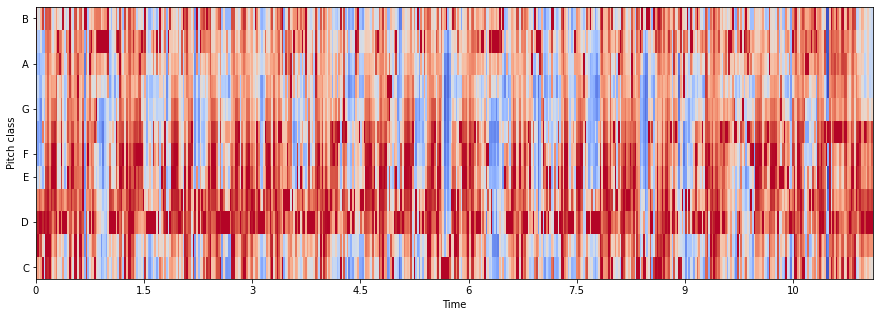

In [77]:
chroma_stft = np.array(feature["chroma_stft"])
display_chroma(chroma_stft_tmp)

In [78]:

chroma_cqt_tmp = np.array([i[:500] for i in chroma_cqt])

(12, 8673)


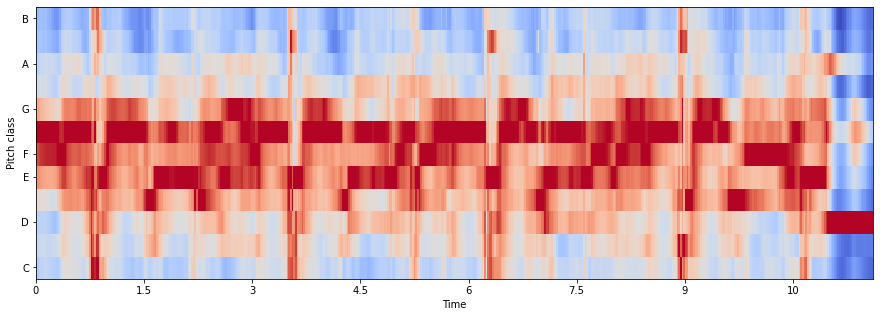

In [79]:
chroma_cqt = np.array(feature["chroma_cqt"])
display_chroma(chroma_cqt_tmp)

In [62]:
tmp = np.array(feature["chroma_cqt"])
tmp[:, :50]

(12, 8673)

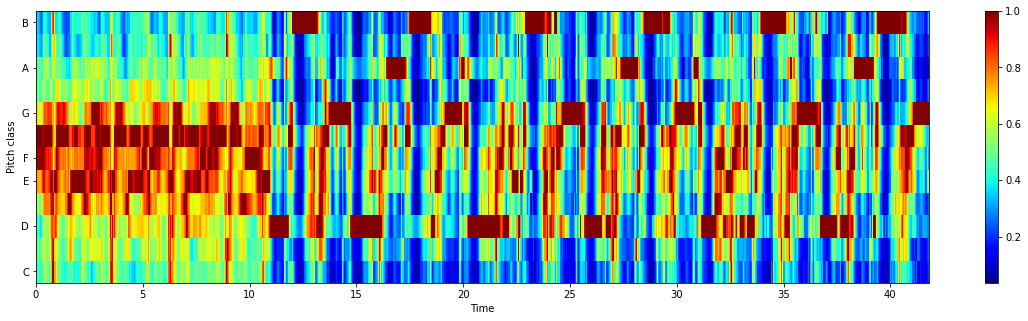

In [86]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(np.array(feature["chroma_cqt"])[:, :1800],x_axis="time", y_axis='chroma', cmap="jet")
plt.colorbar()

### Chroma energy normalized statistics (CENS) 
The main idea of CENS features is that taking statistics over large windows smooths local deviations in tempo, articulation, and musical ornaments such as trills and arpeggiated chords. CENS are best used for tasks such as audio matching and similarity.

CENS功能的主要思想是在大窗戶上進行統計可以消除速度，發音和諸如點綴和琶音和弦等音樂裝飾中的局部偏差。 CENS最適合用於音頻匹配和相似度之類的任務。

(12, 8673)


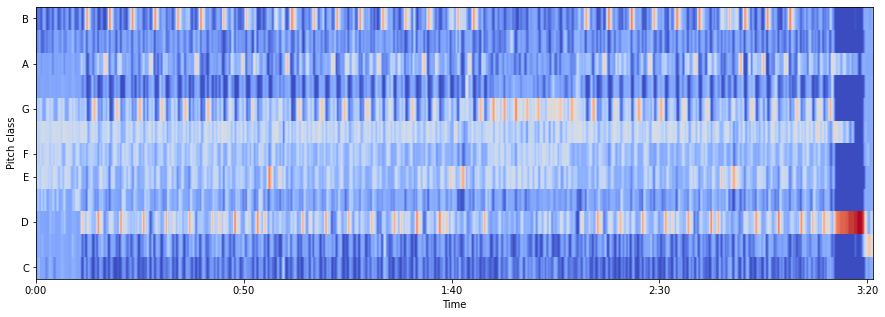

In [18]:
chroma_cens = np.array(feature["chroma_cens"])
display_chroma(chroma_cens)

# Spectral Centroid
The spectral centroid indicates at which frequency the energy of a spectrum is centered upon. This is like a weighted mean:
![](https://i.imgur.com/mNVcXxe.png)

where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.
# Spectral Bandwidth 

computes the order-p spectral bandwidth:
![](https://i.imgur.com/7NhtEtd.png)

where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k, and fc is the spectral centroid. When p=2, this is like a weighted standard deviation.

# Spectral rolloff


Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

spectral_rolloff computes the rolloff frequency for each frame in a signal:


array([0.98792922, 0.17472032, 0.17748807, ..., 0.20082781, 0.24908516,
       0.26914963])

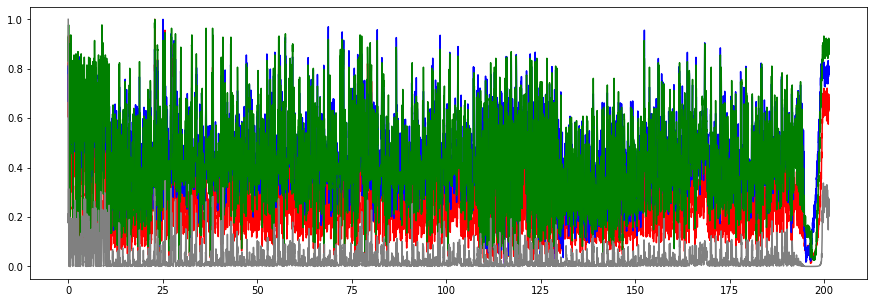

In [42]:
# Compute the time variable for visualization:
spectral_centroids = np.array(feature["spectral_centroid"][0])
spectral_bandwidth = np.array(feature["spectral_bandwidth"])[0]
spectral_rolloff = np.array(feature["spectral_rolloff"])[0]
spectral_flatness = np.array(feature["spectral_flatness"])[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Define a helper function to normalize the spectral centroid for visualization:

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plot the spectral centroid along with the waveform:
plt.figure(figsize=(15, 5))
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes
plt.plot(t, normalize(spectral_bandwidth), color='b')
plt.plot(t, normalize(spectral_rolloff), color='g')
plt.plot(t, normalize(spectral_flatness), color='gray')
spectral_flatness

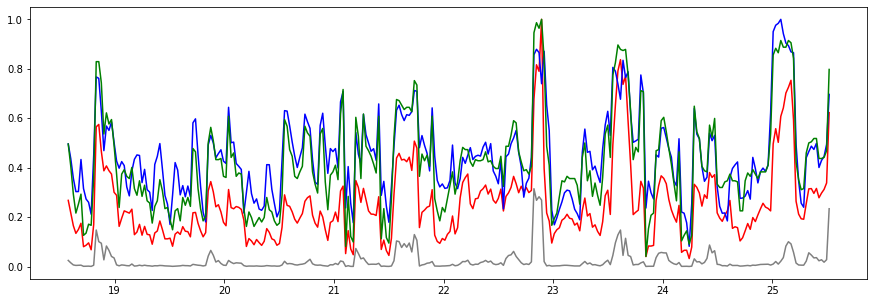

In [90]:
plt.figure(figsize=(15, 5))
plt.plot(t[800:1100], normalize(spectral_centroids)[800:1100], color='r') # normalize for visualization purposes
plt.plot(t[800:1100], normalize(spectral_bandwidth)[800:1100], color='b')
plt.plot(t[800:1100], normalize(spectral_rolloff)[  800:1100], color='g')
plt.plot(t[800:1100], normalize(spectral_flatness)[ 800:1100], color='gray')

# Spectral contrast 
considers the spectral peak, the spectral valley, and their difference in each frequency subband. spectral_contrast computes the spectral contrast for six subbands for each time frame

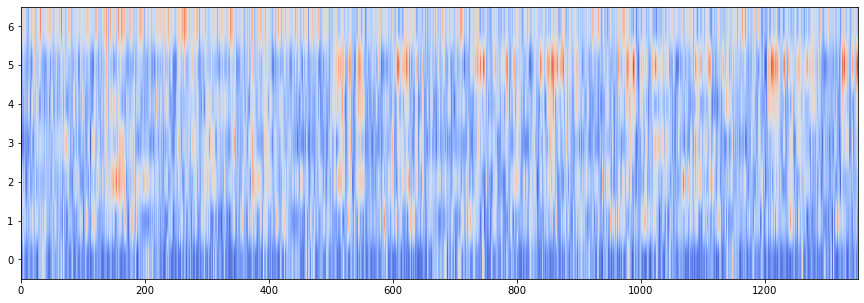

In [83]:
spectral_contrast = np.array(feature["spectral_contrast"])#[0]
plt.figure(figsize=(15, 5))
plt.imshow(normalize(spectral_contrast[:, 450:1800], axis=1), aspect='auto', origin='lower', cmap='coolwarm')